<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


0.5189309576837416

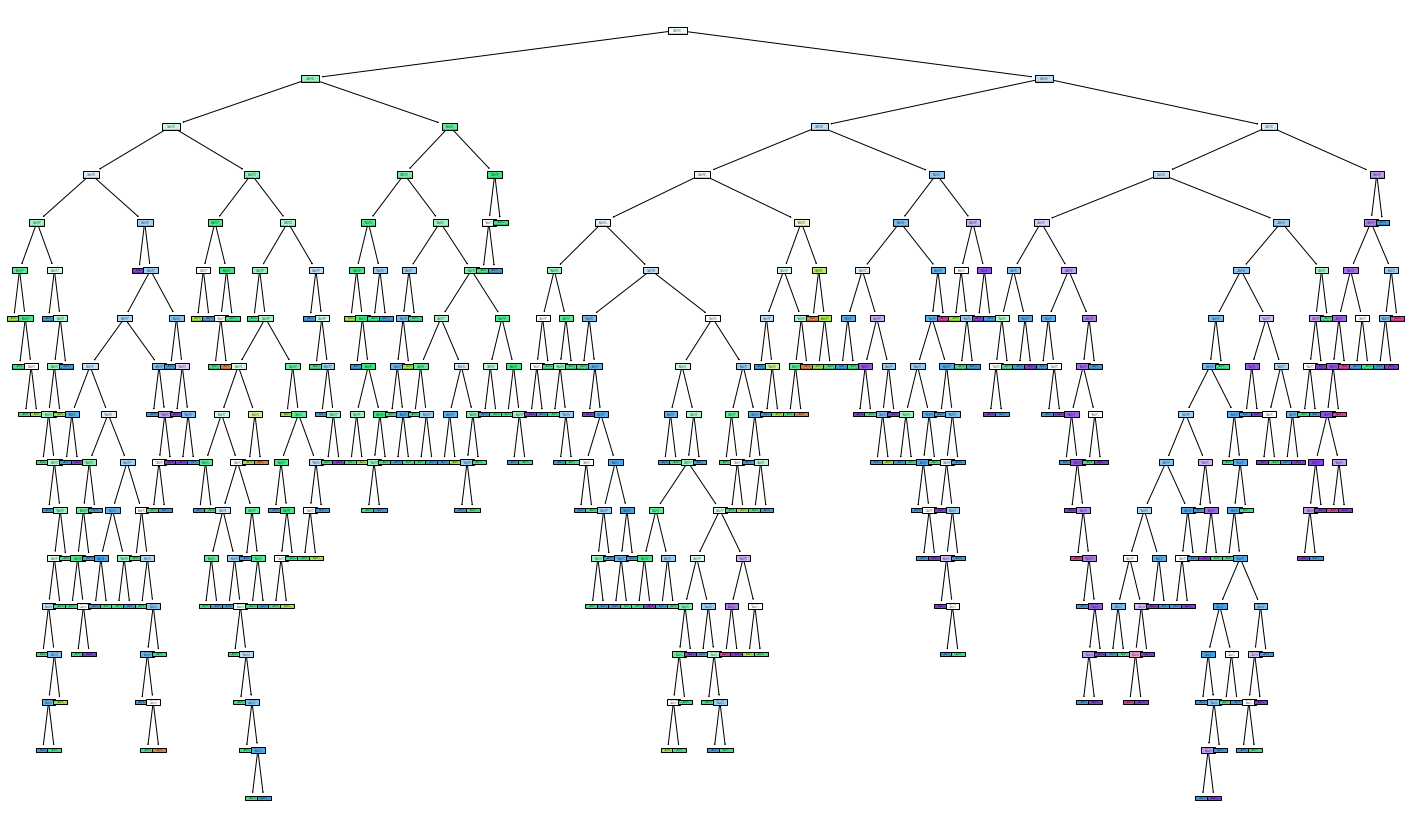

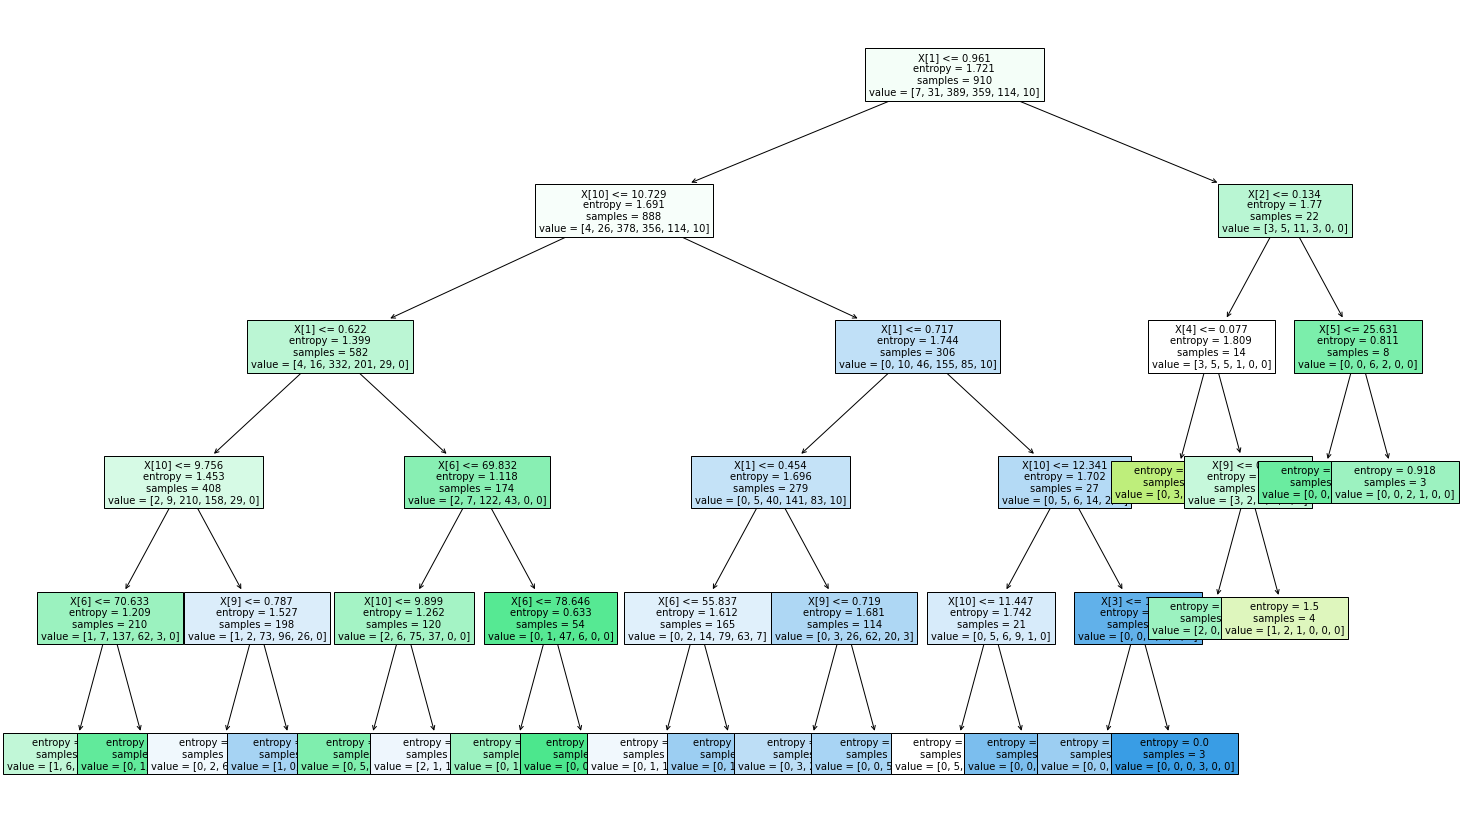

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

df.head()

df.info()

df.describe().T

df['quality'].unique()

df['quality'].nunique()

df['quality'].value_counts()

df.duplicated().sum()

df = df.drop_duplicates()

df

df.duplicated().sum()

X = df.drop('quality', axis=1)

y = df['quality']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=10)

X_train.head()

X_test.head()

y_train.head()

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

model.score(X_train, y_train)

from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=100,filled=True)

fig.savefig("decisionTree.png")

y_predict=model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=3,verbose=1)

grid_searh.fit(X_train,y_train)

grid_searh.best_params_

model_with_best_params=DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,min_samples_leaf= 3,min_samples_split= 5,splitter='random')

model_with_best_params.fit(X_train,y_train)

from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

y_prediction2=model_with_best_params.predict(X_test)

accuracy_score(y_test,y_prediction2)



In [5]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier()

In [6]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [7]:
y_pred_rf=Rf_model.predict(X_test)

In [8]:
accuracy_score(y_test,y_pred_rf)

0.6013363028953229

In [9]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [10]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=Rf_model,param_grid=grid_param,cv=3,verbose=2,n_jobs=-1)

In [11]:
grid_searh.fit(X_train,y_train)

Fitting 3 folds for each of 20736 candidates, totalling 62208 fits
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total ti

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, 

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, 

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, 

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.2s
eatures=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=5, n

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, m

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2,

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2,

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, m

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto,

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, 

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2,

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, m

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, mi

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, m

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto,

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, 

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, 

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto,

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto,

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, 

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, m

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, mi

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto,

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, 

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, 

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, 

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, 

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2,

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, 

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2,

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, 

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto,

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, m

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, 

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto,

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2,

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2,

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, m

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, 

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, m

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2,

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, 

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, 

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, m

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, 

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2,

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, m

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2,

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, 

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, 

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2,

[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=auto, 

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, 

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2,

[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto,

[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, 

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, 

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2,

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, 

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2,

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, mi

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2

[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto,

[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, 

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, 

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, m

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto,

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, 

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, 

[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, 

[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, 

[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2,

[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2,

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, 

[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, 

[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, m

[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2

[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, m

[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=auto, 

[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2,

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2,

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log

[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2,

[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2,

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=9, max_features=log2

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_feature

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_featur

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_feature

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_featur

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_featur

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_feature

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=a

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_featu

[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features

[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features

[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_featur

[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_featu

[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_featur

[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features

[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features

[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_feature

[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_feature

[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_feature

[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_featur

[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_feature

[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_featur

[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=

[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_feature

[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features

[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_feature

[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=11, max_featur

[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features

[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_feature

[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_feature

[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_featur

[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_featur

[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_feature

[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=12, max_featu

[CV] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_featur

[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_feature

[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_feature

[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_feature

[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_feature

[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_featur

[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_featur

[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_featur

[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features

[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_feature

[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_featur

[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_featur

[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features

[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=13, max_feature

[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_feature

[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_feature

[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_feature

[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_featur

[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_featu

[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_featur

[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_feature

[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features

[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=

[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_feature

[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_featur

[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_feature

[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_feature

[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_feature

[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_feature

[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=

[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_featur

[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_feature

[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_feature

[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_feature

[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_featur

[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_featu

[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_feature

[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features

[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_feature

[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features

[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features

[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_featu

[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_feature

[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_featur

[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_featur

[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_featu

[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_feature

[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_featur

[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=16, max_featur

[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_feature

[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=

[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features

[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features

[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_feature

[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_feature

[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features

[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_featur

[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_feature

[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_feature

[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features

[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_featur

[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_featur

[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_featur

[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=17, max_feature

[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features

[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_featu

[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features

[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features

[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_featur

[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_feature

[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_featu

[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_feature

[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features

[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features

[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features

[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=115; total time=   0.3s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features

[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_featur

[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=18, max_featur

[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.3s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_featur

[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_featur

[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_featur

[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_featur

[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features

[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_featur

[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_featur

[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_featur

[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_feature

[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=19, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=gini, max_depth=19, max_feature

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=115; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=115; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=115; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_dep

[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=115; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max

[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=115; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=115; total time=   0.3s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=115; total time=   0.3s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max

[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=9, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=9, min_samples_split=9, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=9, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=7, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max

[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=9, min_samples_split=5, n_estimators=115; total time=   0.1s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=auto, min_samples_leaf=7, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=130; total time=   0.3s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max

[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, 

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=2)

In [12]:
grid_searh.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [25]:
Rf_model_with_best_params=RandomForestClassifier(criterion='entropy',max_depth= 17,max_features= 'auto',min_samples_leaf= 2,min_samples_split= 3,n_estimators=100)

In [26]:
Rf_model_with_best_params.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=2,
                       min_samples_split=3)

In [27]:
y_predict_rf_bp=Rf_model_with_best_params.predict(X_test)

In [28]:
accuracy_score(y_test,y_predict_rf_bp)

0.6102449888641426

In [29]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bagging_svc = BaggingClassifier(base_estimator=SVC(),n_estimators=50, random_state=0).fit(X_train,y_train)


In [30]:
y_predict_bagging=model_bagging_svc.predict(X_test)

In [31]:
accuracy_score(y_test,y_predict_bagging)

0.4766146993318486